### Sendig FCSC 2023 number of solved challenges to team members

In [100]:
import requests
import json
from datetime import datetime

url = "https://france-cybersecurity-challenge.fr/api/v1/scoreboard/top/10/all"

headers = {
    "accept": "application/json",
    "accept-language": "fr,en-US;q=0.9,en;q=0.8,ar;q=0.7,fr-FR;q=0.6,ar-MA;q=0.5",
    "content-type": "application/json",
    "sec-ch-ua": "\"Google Chrome\";v=\"111\", \"Not(A:Brand\";v=\"8\", \"Chromium\";v=\"111\"",
    "sec-ch-ua-mobile": "?1",
    "sec-ch-ua-platform": "\"Android\"",
    "sec-fetch-dest": "empty",
    "sec-fetch-mode": "cors",
    "sec-fetch-site": "same-origin",
    "Referer": "https://france-cybersecurity-challenge.fr/scoreboard/all",
    "Referrer-Policy": "strict-origin-when-cross-origin"  
}
teamMembersEmails = ['alabouchsalaheddine@gmail.com']
teamMembersNames = ("sea", "jsy", "nes-yousss", "Express", "Juju")

myTeamData = []

response = requests.get(url, headers = headers)
if response.status_code == 200 :
    responseText = response.text
    responseJson = json.loads(responseText)
    #print(response.text)
    data = responseJson["data"]
    #print("data : ", data)
    for index in data :
        #print("index : ",index)
        userItem = data[index]
        #print("userItem : ",userItem)
        userName = userItem["name"]
        if userName in teamMembersNames :
            print("FOUND !")
            myTeamData.append(userItem)
    #print(myTeamData)
    users = []
    nbSolvedChallenges = []
    
    
    for userItem in myTeamData :
        name = userItem["name"]
        solves = userItem["solves"]
        nbSolvedChallenges.append(len(solves))
        users.append(name)
    

FOUND !
FOUND !


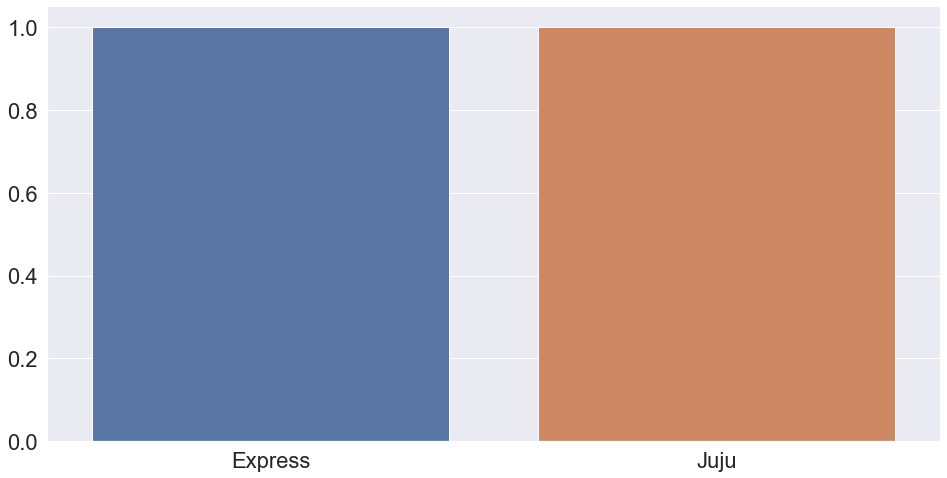

In [113]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=2)
sns.barplot(x=users, y=nbSolvedChallenges)
sns.set(rc={"figure.figsize":(16, 8)})
plt.savefig('images/nbSolvedChallengesByUser.png')

In [109]:

from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.image import MIMEImage

# Define these once; use them twice!
strFrom = 'XXXXXXXX'
strFromPassword = "XXXXXXX"
strTo = 'alabouchsalaheddine@gmail.com'

teamName = "FCSC2023 XXXXXX"

# Create the root message and fill in the from, to, and subject headers
msgRoot = MIMEMultipart('related')
msgRoot['Subject'] = 'Ranking FCSC2023'
msgRoot.preamble = 'This is a multi-part message in MIME format.'

# Encapsulate the plain and HTML versions of the message body in an
# 'alternative' part, so message agents can decide which they want to display.
msgAlternative = MIMEMultipart('alternative')
msgRoot.attach(msgAlternative)

msgText = MIMEText('This is the alternative plain text message.')
msgAlternative.attach(msgText)

# We reference the image in the IMG SRC attribute by the ID we give it below
msgText = MIMEText('<h3>Hello team ' + teamName + '</h3> <h3>Here is the number of challenges solved by each member</h3><br><img src="cid:image1"><br><h3>Good luck!</h3>', 'html')
msgAlternative.attach(msgText)

# This example assumes the image is in the current directory
fp = open('images/nbSolvedChallengesByUser.png', 'rb')
msgImage = MIMEImage(fp.read())
fp.close()

# Define the image's ID as referenced above
msgImage.add_header('Content-ID', '<image1>')
msgRoot.attach(msgImage)



server = smtplib.SMTP('smtp.office365.com', 587)  ### put your relevant SMTP here
server.ehlo()
server.starttls()
server.ehlo()
server.login(strFrom, strFromPassword)  ### if applicable
server.sendmail(strFrom, strTo, msgRoot.as_string())
server.quit()




(221, b'2.0.0 Service closing transmission channel')